Coefficient W0 is 
 30.007507862044548
intercept w1 is 
 0.5697277586423166
error computed is 
 2355.0
length of training data is 
 807
RMSE : 2.7263406704359747
RSE =  2021.757898746332
Mean Error =  2.13946027684955
r2 = 
 -0.2930959727899458


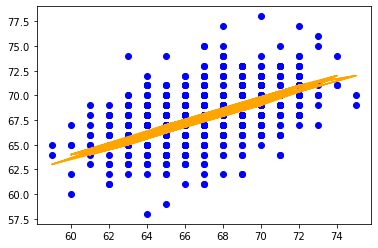

In [9]:
from numpy import *
import matplotlib.pyplot as plt
%matplotlib inline 
import pandas as pd
import math
from sklearn import metrics
from sklearn.metrics import r2_score
def compute_error_for_given_points(b, m, points):
    totalError=0
    for i in range(1,len(points)-1):
        x=points[i,0].reshape(-1,1)
        y=points[i,1].reshape(-1,1)
        totalError += (y - (m * x + b)) ** 2
    print ("Error value ", totalError/2)
    return totalError / 2

def step_gradient(b_current,m_current,points,learning_rate):
    #gradient descent
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(1,len(points)-1):
        x=points[i,0]
        y=points[i,1]
        #print (" x values", x)
        #print ("y values", y)
        b_gradient += -(2/N) * (y-((m_current *x ) + b_current))
        m_gradient += -(2/N) * x * (y-((m_current *x ) + b_current))
        #print ("b_gradient value\n",b_gradient)
        #print ("m_gradient value\n",m_gradient)
    new_b = b_current - (learning_rate*b_gradient)
    new_m = m_current - (learning_rate*m_gradient)
    #print(" values of B and M are \n")
    #print(" B \n", new_b)
    #print("M \n", new_m)
    return [new_b, new_m]    
        
def gradient_descent_runner(points,starting_b,starting_m,learning_rate,num_iterations):
    b=starting_b
    m=starting_m
    
    for i in range(num_iterations):
        b,m=step_gradient(b,m,array(points),learning_rate)
    return [b,m]


def run():
    points = genfromtxt('father_son_heights_train.csv', delimiter=',')
    dataset_test = pd.read_csv('father_son_heights_test.csv')
    x_test = dataset_test['Father'].values.reshape(-1,1)
    y_test = dataset_test['Son'].values.reshape(-1,1)
    y_predict=arange(len(y_test)).reshape(-1,1)
    #print("Father and son data set is \n", points)
    #print("Father and son data set values ")
    
        #print(x, y)
    #hyperparameters
    #y=mx+b
    learning_rate=0.0001
    initial_b=30.0
    initial_m=0.2
    num_iterations=1000
    x=arange(len(points)-1)
    y=arange(len(points)-1)
    y2=arange(len(points)-1)
    e=arange(len(points)-1)
    [b,m]=gradient_descent_runner(points,initial_b,initial_m,learning_rate,num_iterations)
    #error = compute_error_for_given_points(b, m, points)
    print("Coefficient W0 is \n",b)
    print("intercept w1 is \n",m)
    
    
    
    dataset_train = pd.read_csv('father_son_heights_train.csv')
    #dataset_test = pd.read_csv('test.csv')

    # assign data into panda data frames
    x_train = dataset_train['Father'].values.reshape(-1,1)
    #reshaping the 1D array to 2 D to make it easy for sklearn. List to array

    #x_test = dataset_test['Father'].values.reshape(-1,1)
    y_train = dataset_train['Son'].values.reshape(-1,1)
    #y_test = dataset_test['Son'].values.reshape(-1,1)
    er=0.0
    xscp=arange(len(points)-1).reshape(-1,1)
    yscp=arange(len(points)-1).reshape(-1,1)
    for i in range(1,len(points)-1):
        x[i]=points[i,0]
        y[i]=m*x[i]+b
        y2[i]=points[i,1]
        e[i]=(y2[i]-y[i])**2
        er+=(e[i])/2
        xscp[i-1]=x[i]
        yscp[i-1]=y2[i]
        
    print("error computed is \n",er)
    print("length of training data is \n",len(xscp))
    plt.scatter(xscp[0:len(xscp)-1],yscp[0:len(xscp)-1],color = 'blue')
    plt.plot(x[1:len(xscp)-1],y[1:len(xscp)-1],color='orange')
    plt.savefig('gradient_descent_line.png')
    #plt.plot(x[i],y[i],'orange')
    #plt.scatter(x_train[1:],y_train[1:],color = 'blue')
    #plt.plot(x[0:len(points)-1], y[0:len(points)-1], color = 'orange')
    
    y_pred=m*x_test+b
    print("RMSE :", math.sqrt(metrics.mean_squared_error(y_test,y_pred)))
    rse=(metrics.mean_squared_error(y_test,y_pred))*y_test.shape[0]
    print("RSE = ", rse)
    error = sum(abs(y_test - y_pred) / y_test.shape[0]) 
    print("Mean Error = ", error) 
    r2=r2_score(x_test,y_test)
    print("r2 = \n",r2)
if __name__ == '__main__':
    run()
